# GUESS MY WEIGHT 

![guess_your_weight.gif](images/guess_your_weight.gif)

## Table of Contents TOC
[Overview](#overview)<br />
[Data Understanding](#data-understanding)<br />
[Data Preparation](#data-preparation)<br />
[Modeling](#modeling)<br />
[Evaluation](#evaluation)<br />
[Github Repository and Resources](#github-repository-and-resources)<br />


## Overview
Health and Wellness is a big business. Specifically, weight loss. We’re all trying because it’s very, very hard. I recently went on my own weight loss journey, losing about 50 lbs in roughly 18 months. Weighing myself every morning, I agonized over every tenth of a lb, recording it in an app on my phone. I realized that losing big chunks of weights starts with small, incremental progress on the scale. But I didn’t stop there. As a data nerd I thought, “let’s record every meal.” So I did that too. I wondered… given all this data I have, could I predict my weight? My watch and phone captures my exercise, sleep, eating, and so much more. There must be trends here. At a minimum, I should be able to predict whether my weight will go up or down from the previous day. So let’s do it.<br />
[return to TOC](#table-of-contents-TOC)

## Data Understanding
I have much (and probably too much) of this data in my iphone and Apple Watch. It contains the weight information, workouts, heart rate, meals - broken down into subcategories (proteins, fats, etc). Most importantly is the weight. That will be the feature that I primarily use for classification.  

Because it’s my data, there’s more clarity about data entry methods. This is more subjective, than a controlled experiment with many participants. I know what data I was diligent about collecting so I should be able to scrub it appropriately. For instance, I didn’t record my fluids consistently - water, tea, coffee. Water consumption is a big part of this so I’ll have to be clear about the gaps in the data.<br />
[return to TOC](#table-of-contents-TOC)


## Data Preparation
The data is stored on a csv file in a kaggle repository.

in an xml file on my phone. After downloading it into python notebook and digging a little, there are roughly 180 rows of weight entries (approximately 6 months) but it’s not clear how many gaps there are. All of the data is stored as an entry, with time stamps and usually some numeric form. Whether it’s heart rate, weight, caloric info, it’s one numeric entry with an associated units. We’re primarily dealing with ints and floats, all numeric, and we’ll be using daily totals/averages. Because we only have one weigh-in per day, we’re only going to use daily values of other data. So… we know we have approximately 100-180 rows. I can’t say at the moment how many columns, because this will be based on what happens in pre-processing. Which brings me to../.

There are two major challenges with the pre-processing. The first deals with the privacy of my personal health data. How do I balance reproducibility requirements with privacy concerns? I need to make the dataset publicly available, including all of my pre-processing steps, but I also want to make sure no one can link it back to me, Andrew Q. Bennett (my real middle name doesn’t start with Q… gotcha!!!!). And the initial dataset is large, maybe 40 MB. The approach we’ll use is to perform some pre-processing locally, and then upload to the kaggle site when it’s ready for public consumption. In my jupyter notebook, I will comment out some of this code so that we can see the work, but it won’t affect the code when we press “run”.

The second is dealing with correlation efforts. For instance, we know that all data related to working out is going to be correlated with eachother. The steps, average heart rate, workout calories, etc will all be correlated to whether I went for a jog that day. Making decisions about which data to use will be a challenge, even with some baseline domain knowledge. There is a treasure trove that may have nothing (or very little) to do with weight loss, like Vitamin A intake. PCA Analysis will be critical without losing some data. I know about health…but I’m no expert. Maybe Vitamin A intake can help/hurt weight loss.

The many visualization efforts will come from making sure the weight data is presented cleanly. A nice, regression line showing weight trends over different periods will be very helpful.<br />
[return to TOC](#table-of-contents-TOC)

In [1391]:
import pandas as pd
import datetime as dt
from statsmodels.tsa.stattools import adfuller

### Importing csv file

In [1392]:
df = pd.read_csv('pre_kaggle/merge_health_4_25.csv')

In [1393]:
df

,date,BodyMass_lb,StepCount_count,DistanceWalkingRunning_mi,BasalEnergyBurned_Cal,ActiveEnergyBurned_Cal,FlightsClimbed_count,DietaryFatTotal_g,DietaryFatPolyunsaturated_g,DietaryFatMonounsaturated_g,...,DietaryZinc_mg,DietarySelenium_mcg,DietaryCopper_mg,DietaryManganese_mg,DietaryPotassium_mg,AppleExerciseTime_min,SleepAnalysis_AsleepDeep_hrs,SleepAnalysis_AsleepCore_hrs,SleepAnalysis_AsleepREM_hrs,SleepAnalysis_Awake_hrs
0,2023-08-24,196.9,8895.0,4.163569,2055.322,564.7780,24.0,159.7455,11.8,9.5,...,0.5,9.0,0.3,1.1,1572.0,12.0,0.783333,5.558333,1.766667,0.266667
1,2023-08-25,195.1,9276.0,4.512434,2174.950,793.3800,7.0,62.9275,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,36.0,1.008333,3.700000,1.500000,0.133333
2,2023-08-26,195.1,10883.0,4.948209,2074.476,395.3870,9.0,118.3000,8.3,15.0,...,1.4,13.0,0.5,0.8,1943.0,8.0,1.400000,3.916667,1.558333,0.050000
3,2023-08-27,192.9,19174.0,9.909258,2187.383,895.4360,14.0,79.9300,3.1,2.9,...,1.5,18.0,0.3,0.5,1986.0,45.0,0.891667,5.566667,2.591667,0.066667
4,2023-08-28,192.9,13636.0,6.833914,2186.244,901.5490,21.0,70.8500,4.6,7.1,...,1.3,17.0,0.3,0.9,455.0,43.0,0.641667,5.275000,2.008333,0.158333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,2024-03-04,175.7,8191.0,4.051709,1983.933,499.0720,4.0,87.7000,7.9,9.9,...,2.8,58.0,0.3,2.8,1023.0,76.0,0.000000,0.000000,0.000000,0.000000
194,2024-03-05,174.2,8882.0,4.448750,2009.083,566.5723,9.0,88.6000,4.8,6.3,...,1.9,123.0,0.1,0.8,2387.0,135.0,0.816667,4.775000,1.858333,2.683333
195,2024-03-06,173.3,2610.0,1.272886,759.761,127.8580,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
196,2023-08-23,NaN,7325.0,3.399540,2057.531,476.7400,17.0,80.7000,1.8,0.9,...,0.5,2.0,0.2,0.5,422.0,10.0,0.983333,3.400000,1.091667,0.241667


One of the first things will do is make the date the index and convert date to

### Date Column Feature and Formatting

In [1394]:
#convert the date
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [1395]:
df['day'] = df['date'].dt.day_name()
df

,date,BodyMass_lb,StepCount_count,DistanceWalkingRunning_mi,BasalEnergyBurned_Cal,ActiveEnergyBurned_Cal,FlightsClimbed_count,DietaryFatTotal_g,DietaryFatPolyunsaturated_g,DietaryFatMonounsaturated_g,...,DietarySelenium_mcg,DietaryCopper_mg,DietaryManganese_mg,DietaryPotassium_mg,AppleExerciseTime_min,SleepAnalysis_AsleepDeep_hrs,SleepAnalysis_AsleepCore_hrs,SleepAnalysis_AsleepREM_hrs,SleepAnalysis_Awake_hrs,day
0,2023-08-24,196.9,8895.0,4.163569,2055.322,564.7780,24.0,159.7455,11.8,9.5,...,9.0,0.3,1.1,1572.0,12.0,0.783333,5.558333,1.766667,0.266667,Thursday
1,2023-08-25,195.1,9276.0,4.512434,2174.950,793.3800,7.0,62.9275,0.0,0.0,...,0.0,0.0,0.0,0.0,36.0,1.008333,3.700000,1.500000,0.133333,Friday
2,2023-08-26,195.1,10883.0,4.948209,2074.476,395.3870,9.0,118.3000,8.3,15.0,...,13.0,0.5,0.8,1943.0,8.0,1.400000,3.916667,1.558333,0.050000,Saturday
3,2023-08-27,192.9,19174.0,9.909258,2187.383,895.4360,14.0,79.9300,3.1,2.9,...,18.0,0.3,0.5,1986.0,45.0,0.891667,5.566667,2.591667,0.066667,Sunday
4,2023-08-28,192.9,13636.0,6.833914,2186.244,901.5490,21.0,70.8500,4.6,7.1,...,17.0,0.3,0.9,455.0,43.0,0.641667,5.275000,2.008333,0.158333,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,2024-03-04,175.7,8191.0,4.051709,1983.933,499.0720,4.0,87.7000,7.9,9.9,...,58.0,0.3,2.8,1023.0,76.0,0.000000,0.000000,0.000000,0.000000,Monday
194,2024-03-05,174.2,8882.0,4.448750,2009.083,566.5723,9.0,88.6000,4.8,6.3,...,123.0,0.1,0.8,2387.0,135.0,0.816667,4.775000,1.858333,2.683333,Tuesday
195,2024-03-06,173.3,2610.0,1.272886,759.761,127.8580,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,Wednesday
196,2023-08-23,NaN,7325.0,3.399540,2057.531,476.7400,17.0,80.7000,1.8,0.9,...,2.0,0.2,0.5,422.0,10.0,0.983333,3.400000,1.091667,0.241667,Wednesday


In [1396]:
# Make Date the index 
df.set_index('date', inplace=True)

In [1397]:
# delete the last row 
df.drop(['2023-08-22', '2023-08-23'], axis=0,inplace=True)

In [1398]:
df

,BodyMass_lb,StepCount_count,DistanceWalkingRunning_mi,BasalEnergyBurned_Cal,ActiveEnergyBurned_Cal,FlightsClimbed_count,DietaryFatTotal_g,DietaryFatPolyunsaturated_g,DietaryFatMonounsaturated_g,DietaryFatSaturated_g,...,DietarySelenium_mcg,DietaryCopper_mg,DietaryManganese_mg,DietaryPotassium_mg,AppleExerciseTime_min,SleepAnalysis_AsleepDeep_hrs,SleepAnalysis_AsleepCore_hrs,SleepAnalysis_AsleepREM_hrs,SleepAnalysis_Awake_hrs,day
date,,,,,,,,,,,,,,,,,,,,,
2023-08-24,196.9,8895.0,4.163569,2055.322,564.7780,24.0,159.7455,11.8,9.5,36.2203,...,9.0,0.3,1.1,1572.0,12.0,0.783333,5.558333,1.766667,0.266667,Thursday
2023-08-25,195.1,9276.0,4.512434,2174.950,793.3800,7.0,62.9275,0.0,0.0,10.8165,...,0.0,0.0,0.0,0.0,36.0,1.008333,3.700000,1.500000,0.133333,Friday
2023-08-26,195.1,10883.0,4.948209,2074.476,395.3870,9.0,118.3000,8.3,15.0,39.5000,...,13.0,0.5,0.8,1943.0,8.0,1.400000,3.916667,1.558333,0.050000,Saturday
2023-08-27,192.9,19174.0,9.909258,2187.383,895.4360,14.0,79.9300,3.1,2.9,27.9600,...,18.0,0.3,0.5,1986.0,45.0,0.891667,5.566667,2.591667,0.066667,Sunday
2023-08-28,192.9,13636.0,6.833914,2186.244,901.5490,21.0,70.8500,4.6,7.1,16.3000,...,17.0,0.3,0.9,455.0,43.0,0.641667,5.275000,2.008333,0.158333,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-02,174.6,13416.0,6.533640,2048.925,1651.9890,16.0,76.2000,2.4,3.0,25.0000,...,24.0,0.3,1.4,1996.0,148.0,0.000000,0.000000,0.000000,0.000000,Saturday
2024-03-03,175.0,15876.0,7.722016,2048.189,1443.2150,22.0,59.9000,1.3,0.6,9.7000,...,51.0,0.4,3.2,1987.0,173.0,1.108333,3.925000,1.966667,0.300000,Sunday
2024-03-04,175.7,8191.0,4.051709,1983.933,499.0720,4.0,87.7000,7.9,9.9,25.9000,...,58.0,0.3,2.8,1023.0,76.0,0.000000,0.000000,0.000000,0.000000,Monday


### BodyMass Inspection

In [1399]:
df['BodyMass_lb'].describe()

count    196.000000
mean     127.684184
std       88.425096
min        0.000000
25%        0.000000
50%      181.100000
75%      188.300000
max      388.500000
Name: BodyMass_lb, dtype: float64

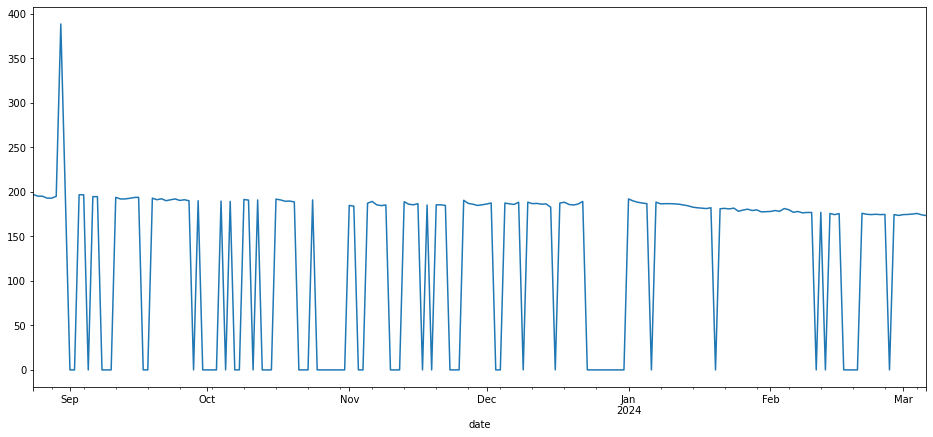

In [1400]:
import matplotlib.pyplot as plt
%matplotlib inline

df['BodyMass_lb'].plot(figsize = (16,7));
plt.show()

In [1401]:
null_weights = len(df[df['BodyMass_lb'] < 100])
total = len(df['BodyMass_lb'])
null_weights/total

0.3163265306122449

We have a few issues to resolve. The biggest issue is the number of zero entries. Based on our knowledge of human weight fluctation, we know it's impossible to weight 0 pounds. More than likely, these are the dates when a wiegh-in was never performed. We should convert these values to NaN to make our graph appear better.

In [1402]:
import numpy as np
#df[df['BodyMass_lb'] == 0]['BodyMass_lb'] = np.NaN 
#df['BodyMass_lb'].replace(0.0,np.NaN)
df.loc[df['BodyMass_lb'] == 0.0,'BodyMass_lb'] = np.nan

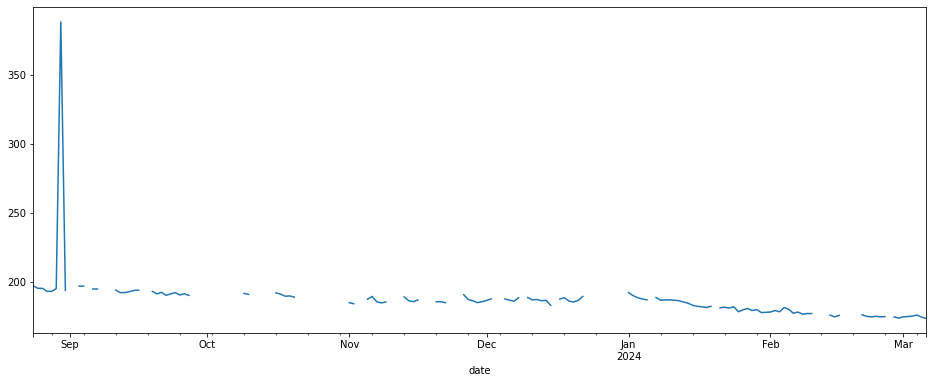

In [1403]:
df['BodyMass_lb'].plot(figsize = (16,6));
plt.show()

In [1404]:
df.loc[df['BodyMass_lb'] == 388.5,'BodyMass_lb'] = np.nan

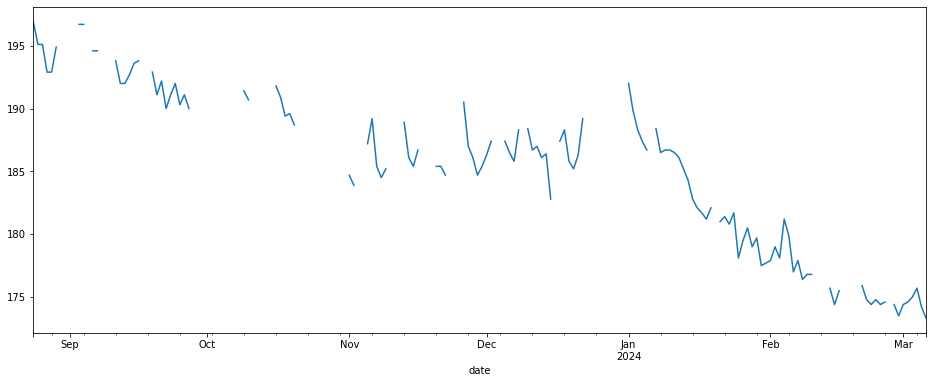

In [1405]:
df['BodyMass_lb'].plot(figsize = (16,6));
plt.show()

This confirms that we don't have much data related to weight prior to late August. When we go into startdate, it might be prudent to consider Aug. 24th as the actual start date. I'm going to modify the data so there's nothing prior

### Important Column inspection - Sleep

In [1406]:
col_sleep = ['SleepAnalysis_AsleepDeep_hrs', 'SleepAnalysis_AsleepCore_hrs', 'SleepAnalysis_AsleepREM_hrs', 'SleepAnalysis_Awake_hrs', 'AppleExerciseTime_min']

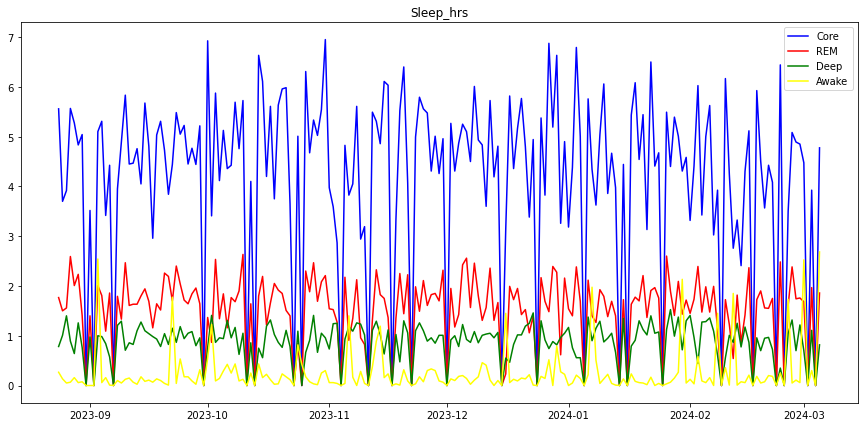

In [1407]:
plt.rcParams['figure.figsize']=(15,7)

plt.plot(df['SleepAnalysis_AsleepCore_hrs'], color='blue', label = 'Core')
plt.plot(df['SleepAnalysis_AsleepREM_hrs'], color='red', label = 'REM')
plt.plot(df['SleepAnalysis_AsleepDeep_hrs'], color='green', label = 'Deep')
plt.plot(df['SleepAnalysis_Awake_hrs'], color='yellow', label = 'Awake')
 
plt.title('Sleep_hrs')
plt.legend()
plt.show()

In [1408]:
df['SleepAnalysis_AsleepDeep_hrs'].replace(to_replace=0,value = df['SleepAnalysis_AsleepDeep_hrs'].mean(), inplace = True)
df['SleepAnalysis_AsleepCore_hrs'].replace(to_replace=0,value = df['SleepAnalysis_AsleepCore_hrs'].mean(), inplace = True)
df['SleepAnalysis_AsleepREM_hrs'].replace(to_replace=0,value = df['SleepAnalysis_AsleepREM_hrs'].mean(), inplace = True)
df['SleepAnalysis_Awake_hrs'].replace(to_replace=0,value = df['SleepAnalysis_Awake_hrs'].mean(), inplace = True)

In [1409]:
df

,BodyMass_lb,StepCount_count,DistanceWalkingRunning_mi,BasalEnergyBurned_Cal,ActiveEnergyBurned_Cal,FlightsClimbed_count,DietaryFatTotal_g,DietaryFatPolyunsaturated_g,DietaryFatMonounsaturated_g,DietaryFatSaturated_g,...,DietarySelenium_mcg,DietaryCopper_mg,DietaryManganese_mg,DietaryPotassium_mg,AppleExerciseTime_min,SleepAnalysis_AsleepDeep_hrs,SleepAnalysis_AsleepCore_hrs,SleepAnalysis_AsleepREM_hrs,SleepAnalysis_Awake_hrs,day
date,,,,,,,,,,,,,,,,,,,,,
2023-08-24,196.9,8895.0,4.163569,2055.322,564.7780,24.0,159.7455,11.8,9.5,36.2203,...,9.0,0.3,1.1,1572.0,12.0,0.783333,5.558333,1.766667,0.266667,Thursday
2023-08-25,195.1,9276.0,4.512434,2174.950,793.3800,7.0,62.9275,0.0,0.0,10.8165,...,0.0,0.0,0.0,0.0,36.0,1.008333,3.700000,1.500000,0.133333,Friday
2023-08-26,195.1,10883.0,4.948209,2074.476,395.3870,9.0,118.3000,8.3,15.0,39.5000,...,13.0,0.5,0.8,1943.0,8.0,1.400000,3.916667,1.558333,0.050000,Saturday
2023-08-27,192.9,19174.0,9.909258,2187.383,895.4360,14.0,79.9300,3.1,2.9,27.9600,...,18.0,0.3,0.5,1986.0,45.0,0.891667,5.566667,2.591667,0.066667,Sunday
2023-08-28,192.9,13636.0,6.833914,2186.244,901.5490,21.0,70.8500,4.6,7.1,16.3000,...,17.0,0.3,0.9,455.0,43.0,0.641667,5.275000,2.008333,0.158333,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-02,174.6,13416.0,6.533640,2048.925,1651.9890,16.0,76.2000,2.4,3.0,25.0000,...,24.0,0.3,1.4,1996.0,148.0,0.863462,4.172222,1.510000,0.252308,Saturday
2024-03-03,175.0,15876.0,7.722016,2048.189,1443.2150,22.0,59.9000,1.3,0.6,9.7000,...,51.0,0.4,3.2,1987.0,173.0,1.108333,3.925000,1.966667,0.300000,Sunday
2024-03-04,175.7,8191.0,4.051709,1983.933,499.0720,4.0,87.7000,7.9,9.9,25.9000,...,58.0,0.3,2.8,1023.0,76.0,0.863462,4.172222,1.510000,0.252308,Monday


In [1410]:
df[col_sleep] = df[col_sleep].fillna(df[col_sleep].mean())

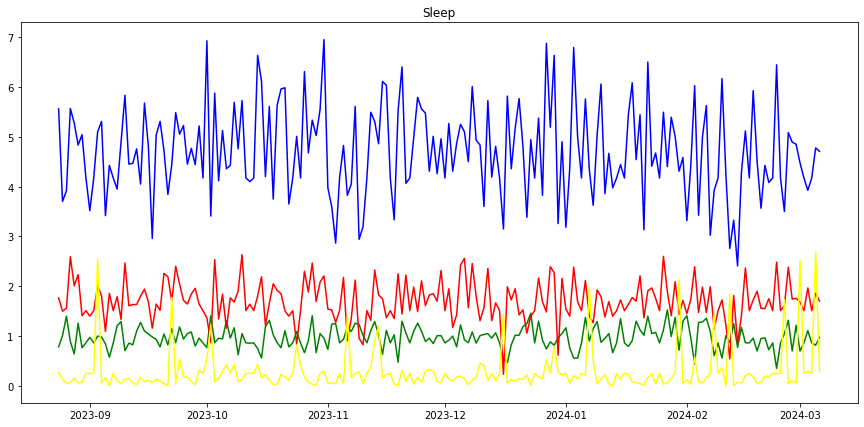

In [1411]:
plt.rcParams['figure.figsize']=(15,7)

plt.plot(df['SleepAnalysis_AsleepDeep_hrs'], color='green')
plt.plot(df['SleepAnalysis_AsleepCore_hrs'], color='blue')
plt.plot(df['SleepAnalysis_AsleepREM_hrs'], color='red')
plt.plot(df['SleepAnalysis_Awake_hrs'], color='yellow')
 
plt.title('Sleep')
plt.show()

### Important Column inspection - Exercise

In [1412]:
col_exercise = ['StepCount_count', 'DistanceWalkingRunning_mi', 'BasalEnergyBurned_Cal', 'ActiveEnergyBurned_Cal', 'FlightsClimbed_count']

In [1413]:
df.drop(['StepCount_count', 'DistanceWalkingRunning_mi', 'FlightsClimbed_count'], axis = 1, inplace = True)

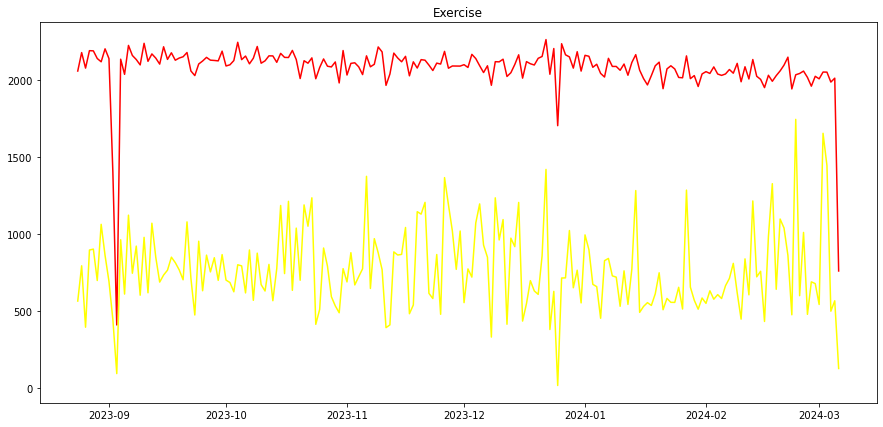

In [1414]:
plt.rcParams['figure.figsize']=(15,7)

#plt.plot(df['StepCount_count'], color='green')
#plt.plot(df['DistanceWalkingRunning_mi'], color='blue')
plt.plot(df['BasalEnergyBurned_Cal'], color='red')
plt.plot(df['ActiveEnergyBurned_Cal'], color='yellow')
#plt.plot(df['FlightsClimbed_count'], color='yellow')
 
plt.title('Exercise')
plt.show()

In [1415]:
#Cond_act = df['ActiveEnergyBurned_Cal'] < 250
#bas_act = df['BasalEnergyBurned_Cal'] < 250

df.loc[df['ActiveEnergyBurned_Cal'] < 250, 'ActiveEnergyBurned_Cal'] = df['ActiveEnergyBurned_Cal'].mean()
df.loc[df['BasalEnergyBurned_Cal'] < 1750, 'BasalEnergyBurned_Cal'] = df['BasalEnergyBurned_Cal'].mean()


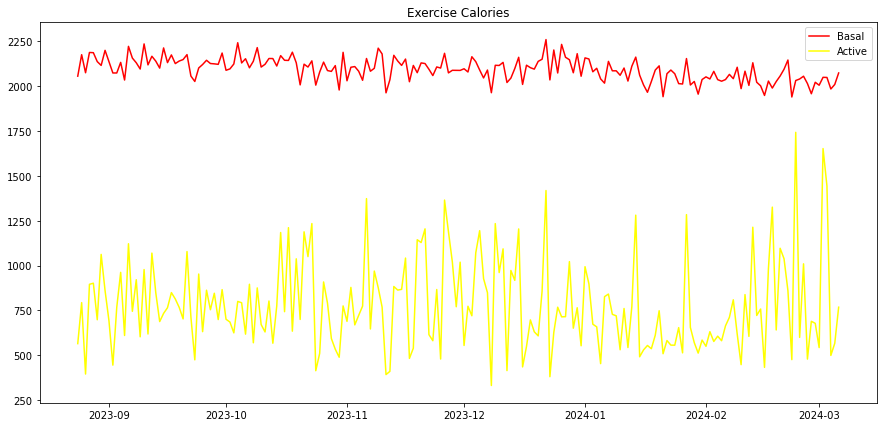

In [1416]:
plt.rcParams['figure.figsize']=(15,7)

#plt.plot(df['StepCount_count'], color='green')
#plt.plot(df['DistanceWalkingRunning_mi'], color='blue')
plt.plot(df['BasalEnergyBurned_Cal'], color='red', label = 'Basal')
plt.plot(df['ActiveEnergyBurned_Cal'], color='yellow', label = 'Active')
#plt.plot(df['FlightsClimbed_count'], color='yellow')
 
plt.title('Exercise Calories')
plt.legend()
plt.show()

### Important Column inspection - Dietary

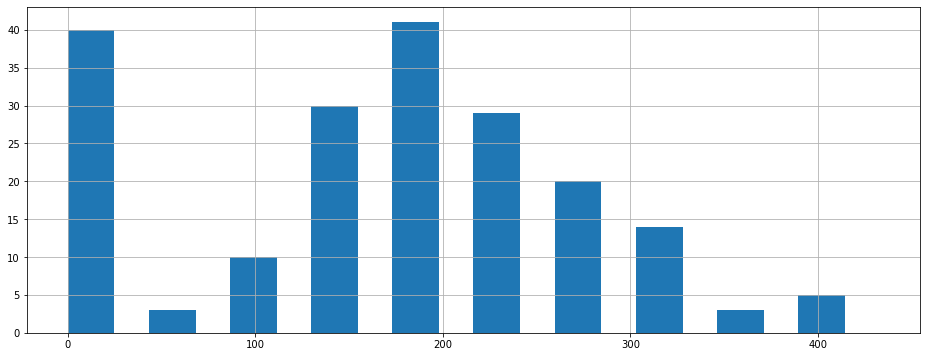

In [1417]:
df['DietaryCarbohydrates_g'].hist(figsize = (16,6), width = 25);
plt.show()

In [1418]:
null_carbs = len(df[df['DietaryCarbohydrates_g'] == 0])
null_carbs/total

0.18877551020408162

OKay, so we have considerable 0 values here. 

Missing at Random (MAR): Data points are missing depending on observed values in other variables, but not on the missing values themselves. This is a more complex scenario, but imputation using observed data can still be effective.

After doing some previewing, I'm determining that those 3 data points, whose carbs are under 75g, are also incomplete. So this isn't just the carbohydrate data, but all of the dietary information. So, we'll set all of the dietary information to Nan where the daily carbohydrates are less than 75g.


In [1419]:
#we'll go ahead and limit the 
Nan_cond = df['DietaryCarbohydrates_g'] < 75.0

col_dietary = [col for col in df.columns if "Dietary" in col]
df.loc[df['DietaryCarbohydrates_g'] < 75.0, col_dietary] = np.nan


#df.loc[df['DietaryCarbohydrates_g'] < 75.0,'DietaryCarbohydrates_g'] = np.nan

In [1420]:
df.loc['2023-08-29':'2023-09-04','DietaryFatTotal_g':'DietaryProtein_g']

,DietaryFatTotal_g,DietaryFatPolyunsaturated_g,DietaryFatMonounsaturated_g,DietaryFatSaturated_g,DietaryCholesterol_mg,DietarySodium_mg,DietaryCarbohydrates_g,DietaryFiber_g,DietarySugar_g,DietaryEnergyConsumed_Cal,DietaryProtein_g
date,,,,,,,,,,,
2023-08-29,144.7,7.2,9.5,31.79,1020.0,5397.5,252.36,23.63,57.04,3275.0,320.99
2023-08-30,109.6,19.8,24.2,27.10,323.0,2111.0,153.80,14.80,58.50,1983.0,99.50
2023-08-31,53.5,4.8,7.4,16.70,317.0,3635.0,129.60,14.70,32.90,1635.0,87.90
2023-09-01,150.7,11.7,36.7,54.40,748.0,4619.0,424.20,28.00,116.20,3767.0,98.70
2023-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-04,102.3,4.7,21.4,29.80,62.0,2549.0,260.20,21.50,41.60,2627.0,45.90


Let's figure out which columns we want to keep.

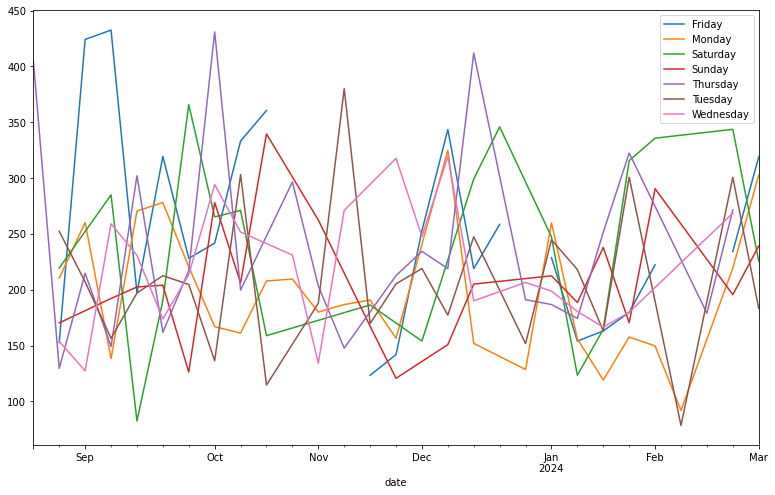

In [1421]:
#let's plot our carbohydrates
df.groupby(['day'])['DietaryCarbohydrates_g'].plot(figsize = (13,8), subplots=False, legend=True);
plt.show()

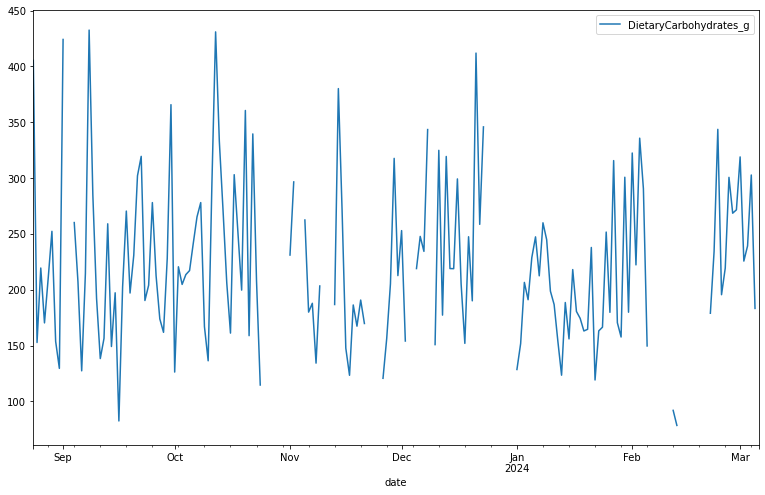

In [1422]:
#let's plot our carbohydrates
df['DietaryCarbohydrates_g'].plot(figsize = (13,8), subplots=False, legend=True);
plt.show()

okay, so we have some gaps to fill, let's start with filling in some 

Let's look at our null data

In [1423]:
nul_carbs = pd.isnull(df['DietaryCarbohydrates_g'])
df[nul_carbs]['DietaryCarbohydrates_g']

date
2023-09-02   NaN
2023-09-03   NaN
2023-10-25   NaN
2023-10-26   NaN
2023-10-27   NaN
2023-10-28   NaN
2023-10-29   NaN
2023-10-31   NaN
2023-11-03   NaN
2023-11-04   NaN
2023-11-10   NaN
2023-11-11   NaN
2023-11-12   NaN
2023-11-22   NaN
2023-11-23   NaN
2023-11-25   NaN
2023-12-03   NaN
2023-12-04   NaN
2023-12-09   NaN
2023-12-24   NaN
2023-12-25   NaN
2023-12-26   NaN
2023-12-27   NaN
2023-12-28   NaN
2023-12-29   NaN
2023-12-30   NaN
2023-12-31   NaN
2024-02-06   NaN
2024-02-07   NaN
2024-02-08   NaN
2024-02-09   NaN
2024-02-10   NaN
2024-02-11   NaN
2024-02-14   NaN
2024-02-15   NaN
2024-02-16   NaN
2024-02-17   NaN
2024-02-18   NaN
2024-02-19   NaN
2024-02-20   NaN
2024-02-21   NaN
2024-03-06   NaN
Name: DietaryCarbohydrates_g, dtype: float64

A quick scan here shows that we have chunks of time series data missing. The best way to handle this, in my opion, is to divide into two subsets, to disregard those stretches of missing data.

These chunks will be (8-23: 10-24), (10-31: 12-23), (1-01: 02-05), (02-22: 03-05). These were chunks of data were determined by finding "chunks" of both null and valid data. Chunks of valid data were determined to have no more than 3 consecutive days of null data. To fill these in, let's start create the chunks

In [1424]:
SepOct = df['2023-08-23':'2023-10-24']
NovDec = df['2023-10-31':'2023-12-23']
Jan = df['2024-01-01':'2024-02-05']
FebMar = df['2024-02-24':'2024-03-05']

okay, now let's fill in the null values with the mean for all of the dietary nulls here.

In [1425]:
df[col_dietary] = df[col_dietary].fillna(df[col_dietary].mean())

Okay so this looks promising. We see a little flattening of the curve, but, it doesn't mess with our data too much. Let's go ahead and create this for all of our data, in Sept, Oct

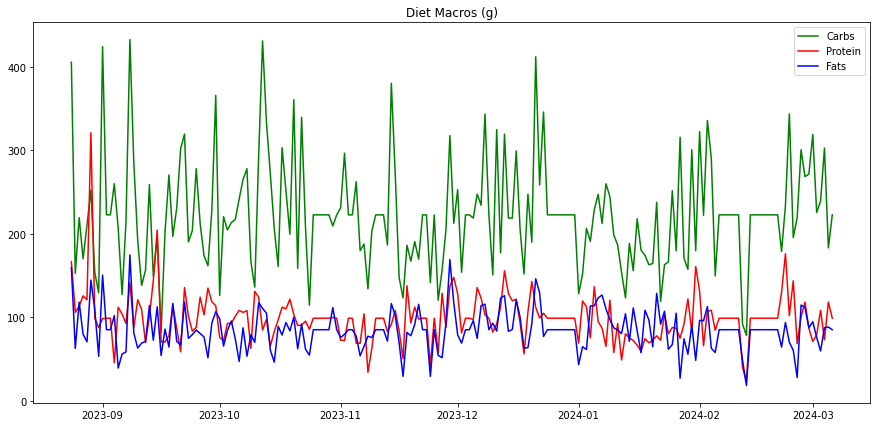

In [1426]:
plt.rcParams['figure.figsize']=(15,7)

plt.plot(df['DietaryCarbohydrates_g'], color='green', label = 'Carbs')
plt.plot(df['DietaryProtein_g'], color='red', label = 'Protein')
plt.plot(df['DietaryFatTotal_g'], color='blue', label = 'Fats')
 
plt.title('Diet Macros (g)')
plt.legend()
plt.show()

### Focusing on Weight
What we really care about is weight, and the difference of weight.

#### Test for Stationality
First, let's use a Dickey-Fuller Test on our data to see if we have Stationality. We're going to use the Dickey-Fuller test in the stats model. This function does not permit null values. And, we have some null values, so we'll have to fill in missing data. To do this, we'll need to utilize a certain level of synthetic data. For starters, let's just first look at our data. 

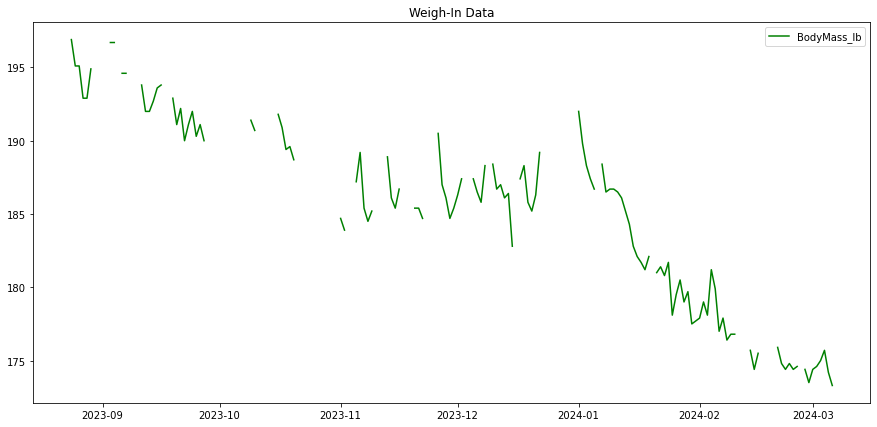

In [1427]:
plt.rcParams['figure.figsize']=(15,7)

plt.plot(df['BodyMass_lb'], color='green', label = 'BodyMass_lb')
 
plt.title('Weigh-In Data')
plt.legend()
plt.show()

In [1428]:
df['BodyMass_lb_inter'] = df['BodyMass_lb'].interpolate(option='spline')

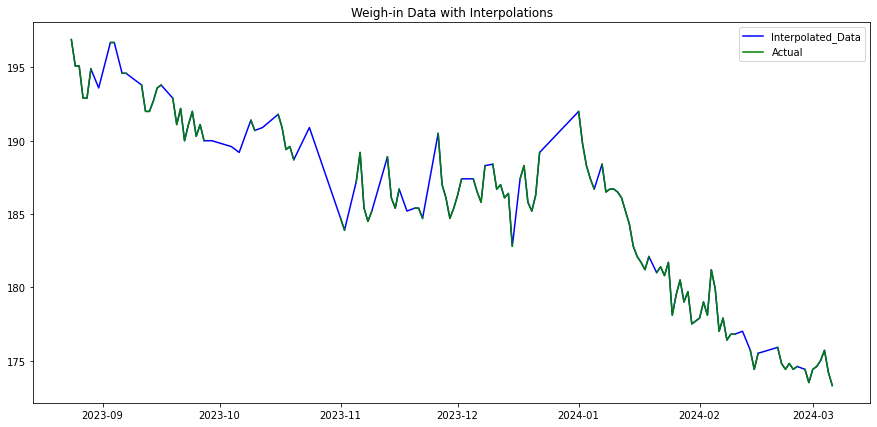

In [1429]:
plt.rcParams['figure.figsize']=(15,7)

plt.plot(df['BodyMass_lb_inter'], color='blue', label = 'Interpolated_Data')
plt.plot(df['BodyMass_lb'], color='green', label = 'Actual')

 
plt.title('Weigh-in Data with Interpolations')
plt.legend()
plt.show()

In [1430]:
df['BodyMass_lb_diff'] = df['BodyMass_lb_inter'].diff() 

In [1431]:
df['BodyMass_lb_diff'].mean()

-0.12102564102564099

In [1432]:
df['BodyMass_lb_diff'].std()

1.1292125290507826

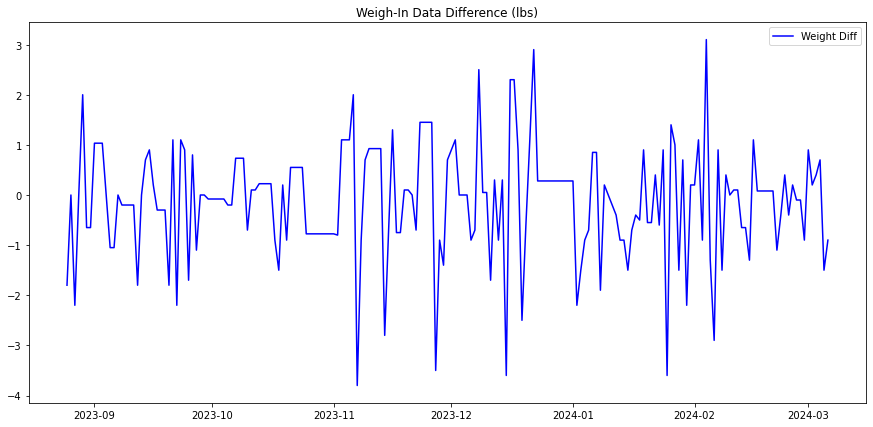

In [1433]:
plt.rcParams['figure.figsize']=(15,7)

plt.plot(df['BodyMass_lb_diff'], color='blue', label = 'Weight Diff')

plt.title('Weigh-In Data Difference (lbs)')
plt.legend()
plt.show()

In [1434]:
#SepOct = df['2023-08-23': '2023-10-24']
#NovDec = df['2023-10-31': '2023-12-23']
#Jan = df['2024-01-01': '2024-02-05']
#FebMar = df['2024-02-24': '2024-03-05']

#new_df = pd.concat([SepOct, NovDec, Jan, FebMar])


In [1435]:
df['BodyMass_lb_diff'].dropna(inplace=True)

In [1436]:
new_df = df.drop('2023-08-24', axis=0)

In [1437]:
new_df['BodyMass_lb_diff'].isna().sum()


0

Now that we have differenced the data, and have nothing null, let's go ahead and test for Dickey-Fuller

In [1438]:
dftest = adfuller(new_df['BodyMass_lb_diff'])

In [1439]:
 # Print Dickey-Fuller test results
print('Results of Dickey-Fuller Test: \n')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)
    

Results of Dickey-Fuller Test: 

Test Statistic                -9.581410e+00
p-value                        2.153488e-16
#Lags Used                     3.000000e+00
Number of Observations Used    1.910000e+02
Critical Value (1%)           -3.465059e+00
Critical Value (5%)           -2.876794e+00
Critical Value (10%)          -2.574901e+00
dtype: float64


This looks good. The differenced data appears stationary. Let's see how the decomposed time looks.

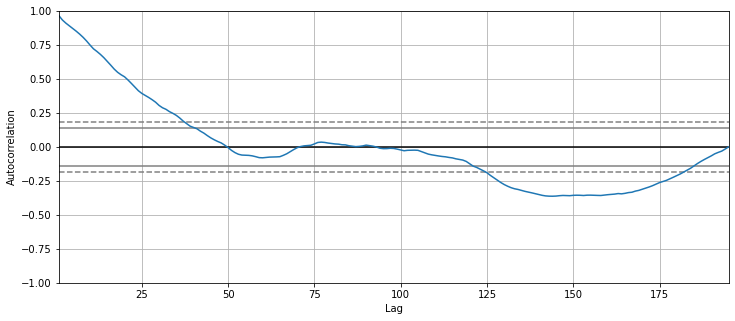

In [1440]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(new_df['BodyMass_lb_inter']);


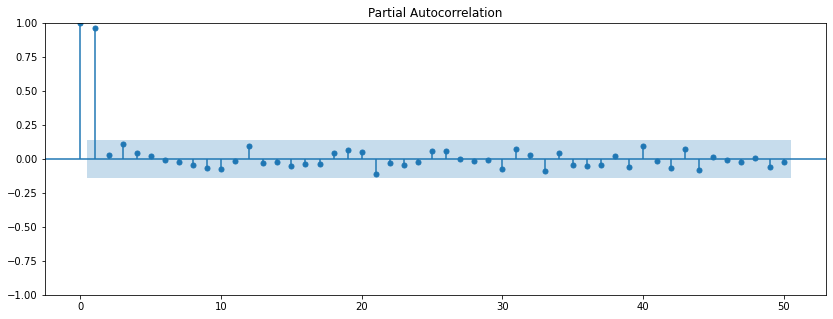

In [1441]:
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_pacf(new_df['BodyMass_lb_inter'], lags=50);

Both plots look pretty stationary. So that's great. Also, both plots trail off with time. This is a good sign that these functions are a good candidate for AutoRegressive (AR) and Moving Average (MA) Analysis

#### ARMA Analysis
We've confirmed our data is stationary. We observed the PACF And ACF plots and understood that both trail off wtih time. This means our weigh-in data is a good candidate for both AR and MA. To do this. We're going to utilize our original weigh-in data. There's plenty of missing data, but luckily our ARIMA works with missing data. We also no that 1st order differencing made our data stationary, so we can jump straight to that when we check for ARMA.

In [1442]:
new_df['BodyMass_lb_inter'].isna().sum()

0

In [1443]:
# split into train and test sets. Let's do an 80/20 split
#SepOct = new_df['2023-08-25': '2023-10-24']
#NovDec = new_df['2023-10-31': '2023-12-23']
#Jan = new_df['2024-01-01': '2024-02-05']
#FebMar = new_df['2024-02-24': '2024-03-05']

train = new_df['2023-08-25': '2023-12-23']['BodyMass_lb_inter']
test = new_df['2023-12-24': '2024-03-05']['BodyMass_lb_inter']

train_len = len(train)
test_len = len(test)

# walk-forward validation


In [1444]:
#pip install pmdarima

In [1445]:
from pmdarima import auto_arima

model = auto_arima(new_df['BodyMass_lb_inter'], seasonal=False, m=0, stepwise=True)

# Get the best ARIMA model
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  195
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -294.205
Date:                Tue, 14 May 2024   AIC                            596.410
Time:                        12:26:03   BIC                            609.482
Sample:                    08-25-2023   HQIC                           601.703
                         - 03-06-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0366      0.020     -1.787      0.074      -0.077       0.004
ar.L1          0.6675      0.149      4.488      0.000       0.376       0.959
ma.L1         -0.8108      0.125     -6.463      0.0

So... we run the auto and we find the most accurate ARIMA arrangement, which is 1st order lagged on both the moving average and the autoregressed term. This makes sense - we already determined that the differenced data was stationary, and it appears that we also care about both AR and MA. To run the auto, we had to use some synthetic data, but we can also utilize a manual check. We can also check the interpolated data and the actual data.

In [1446]:
# Import ARIMA
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

# Instantiate an AR(1) model to the simulated data
mod_arma_raw = ARIMA(new_df['BodyMass_lb_inter'], order=(1,1,1))

C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [1447]:
# Fit the model to data
res_arma_raw = mod_arma_raw.fit()

C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [1448]:
# Print out summary information on the fit
print(res_arma_raw.summary())

                               SARIMAX Results                                
Dep. Variable:      BodyMass_lb_inter   No. Observations:                  195
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -296.540
Date:                Tue, 14 May 2024   AIC                            599.080
Time:                        12:26:03   BIC                            608.884
Sample:                    08-25-2023   HQIC                           603.050
                         - 03-06-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6205      0.237      2.623      0.009       0.157       1.084
ma.L1         -0.7385      0.215     -3.439      0.001      -1.159      -0.318
sigma2         1.2448      0.108     11.539      0.0

So it appears we got a significantly more accurate model, which also dropped out the Y-intercept term. We also have statistically significant

In [1449]:
# Instantiate an MA(1) model to the simulated data
mod_arma_inter = ARIMA(new_df['BodyMass_lb_inter'], order=(1,1,1))

# Fit the model to data
res_arma_inter = mod_arma_inter.fit()

# Print out summary information on the fit
print(res_arma_inter.summary())

                               SARIMAX Results                                
Dep. Variable:      BodyMass_lb_inter   No. Observations:                  195
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -296.540
Date:                Tue, 14 May 2024   AIC                            599.080
Time:                        12:26:03   BIC                            608.884
Sample:                    08-25-2023   HQIC                           603.050
                         - 03-06-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6205      0.237      2.623      0.009       0.157       1.084
ma.L1         -0.7385      0.215     -3.439      0.001      -1.159      -0.318
sigma2         1.2448      0.108     11.539      0.0

C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\

Interesting. On our first check with got an AIC/BIC in the high 400s, but coefficients with high high statistical confidence. This was using the raw, uninterpolated data. Let's see how this look with the interpolated data.

In [1450]:
arma_raw_resid = pd.Series(res_arma_raw.resid)
arma_raw_resid.drop('2023-08-25', axis = 0, inplace = True)

arma_inter_resid = pd.Series(res_arma_inter.resid)
arma_inter_resid.drop('2023-08-25', axis = 0, inplace = True)

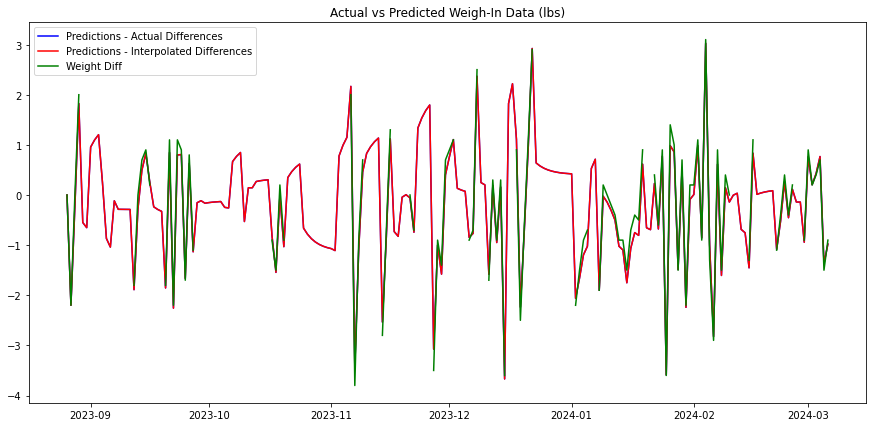

In [1451]:
plt.rcParams['figure.figsize']=(15,7)

plt.plot(arma_raw_resid, color='blue', label = 'Predictions - Actual Differences')
plt.plot(arma_inter_resid, color='red', label = 'Predictions - Interpolated Differences')
plt.plot(new_df['BodyMass_lb'].diff(), color='green', label = 'Weight Diff')

plt.title('Actual vs Predicted Weigh-In Data (lbs)')
plt.legend()
plt.show()

In [1452]:
arma_inter_resid.mean()

-0.15949596976660105

So... we can see that the predictions with interpolated differences, do a good job of sticking to the general peaks. We don't visually see much of a drop off in accuracy, even though our model tells us otherwise. I'm inclined to utilize the residuals from the interpolated data as our error.

But what does this mean about our weight data?  It means that are both enourages and fights whatever weight difference we experienced? It's almost as if a part of our metabolism wants to continue a trend and another part is trying to course correct. Anecdotally, there are stories about how really in shape super athletes will metablolize excess carbs/fat as opposed to storing them as fat. It's almost if the body knows our behavior, and wants to continue it. Why store fat on an athlete that is in burn mode. Let's just store as glycogen or, get rid of it. On the one hand, the course correction side, perhaps there's a mechanism in our body that's continually trying to use/store/release all of the calolories that are body consumes. Perhaps as very finite corrections. As if the body says, "Well, I thought I was going to burn X amount of calories, but I only burned Y. So tomorrow, I'll slow down and metabolize less." The course correction could also swing the other way - if too much weight gain, the body could metabolize more.

But how does that account for weight loss. That's where our trend of moving average comes in (also, the drift in the random walk model). Herein lies a conundrum, our original weight difference numbers passed the test for stationality, but there is a slight trend in the data (-.12). This is approximately 0.12 lbs per day that, on average, of weight loss. It's small enough to not throw off stationality, yet large enough to lose more than 15 lbs in 6 months.

Okay, so, back to our diet information. We have two separate errors now from which we can predict some noise. First we have our original weight loss change from day to day. Second, we have the residuals from our ARMA model with which it predict. So... let's do it.

### Feature Engineering

So, now that we added have scrubbed our data. We're going to create a few different target variables, all in the name of weight loss. The first, will be just the difference of our weight loss from day to day. The second, will be the residuals from our predicted

In [1453]:
#let's separate our target and feature columns.
df['diff_inter'] = arma_inter_resid
df['BodyMass_lb_raw'] = df['BodyMass_lb']


df.drop('BodyMass_lb', axis = 1, inplace = True)
df.drop('day', axis = 1, inplace = True)

In [1454]:
series = df['BodyMass_lb_inter'].reset_index()

for ind in range(0,len(series)-1):
    series.loc[ind, 'BodyMass_lb_inter'] = series.loc[ind+1, 'BodyMass_lb_inter']
series.loc[ind+1, 'BodyMass_lb_inter'] = np.NaN
series.set_index('date', inplace = True)

df['BodyMass_lb_lagged'] = series
df['BodyMass_lb_lagged_diff'] = df['BodyMass_lb_lagged'].diff()
df.loc['2023-08-24','BodyMass_lb_lagged_diff'] = -1.8

We can also use this time to make a category to determine if weight loss occurred. This is relatively simple. Let's call it weight loss, and we'll give it a 1, if there's was weight loss, and 0 if there wasn't. In this scenario, even 0 lbs would be the same as weight gain.

In [1455]:
df['weight_loss'] = df['BodyMass_lb_lagged_diff'] < 0.0
df['weight_loss'] = df['weight_loss'].astype(int)

### PCA
Now that we have all of these feature variables, and we believe we're in good shape. Let's figure out

In [1456]:
targets = df.loc[:,'BodyMass_lb_inter':'BodyMass_lb_lagged_diff']
features = df.loc[:,'BasalEnergyBurned_Cal':'SleepAnalysis_Awake_hrs']

In [1457]:
features

,BasalEnergyBurned_Cal,ActiveEnergyBurned_Cal,DietaryFatTotal_g,DietaryFatPolyunsaturated_g,DietaryFatMonounsaturated_g,DietaryFatSaturated_g,DietaryCholesterol_mg,DietarySodium_mg,DietaryCarbohydrates_g,DietaryFiber_g,...,DietaryZinc_mg,DietarySelenium_mcg,DietaryCopper_mg,DietaryManganese_mg,DietaryPotassium_mg,AppleExerciseTime_min,SleepAnalysis_AsleepDeep_hrs,SleepAnalysis_AsleepCore_hrs,SleepAnalysis_AsleepREM_hrs,SleepAnalysis_Awake_hrs
date,,,,,,,,,,,,,,,,,,,,,
2023-08-24,2055.322000,564.778000,159.745500,11.800000,9.500000,36.22030,565.69000,8798.470000,405.441300,50.751100,...,0.500000,9.000000,0.300000,1.100000,1572.000000,12.0,0.783333,5.558333,1.766667,0.266667
2023-08-25,2174.950000,793.380000,62.927500,0.000000,0.000000,10.81650,296.60000,3860.600000,152.775000,19.182000,...,0.000000,0.000000,0.000000,0.000000,0.000000,36.0,1.008333,3.700000,1.500000,0.133333
2023-08-26,2074.476000,395.387000,118.300000,8.300000,15.000000,39.50000,380.00000,4585.000000,219.500000,14.800000,...,1.400000,13.000000,0.500000,0.800000,1943.000000,8.0,1.400000,3.916667,1.558333,0.050000
2023-08-27,2187.383000,895.436000,79.930000,3.100000,2.900000,27.96000,320.00000,6119.000000,170.340000,43.020000,...,1.500000,18.000000,0.300000,0.500000,1986.000000,45.0,0.891667,5.566667,2.591667,0.066667
2023-08-28,2186.244000,901.549000,70.850000,4.600000,7.100000,16.30000,375.00000,5591.000000,210.400000,26.400000,...,1.300000,17.000000,0.300000,0.900000,455.000000,43.0,0.641667,5.275000,2.008333,0.158333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-02,2048.925000,1651.989000,76.200000,2.400000,3.000000,25.00000,182.00000,4885.000000,225.700000,23.600000,...,1.100000,24.000000,0.300000,1.400000,1996.000000,148.0,0.863462,4.172222,1.510000,0.252308
2024-03-03,2048.189000,1443.215000,59.900000,1.300000,0.600000,9.70000,289.00000,3056.000000,239.300000,17.500000,...,3.200000,51.000000,0.400000,3.200000,1987.000000,173.0,1.108333,3.925000,1.966667,0.300000
2024-03-04,1983.933000,499.072000,87.700000,7.900000,9.900000,25.90000,293.00000,2816.000000,302.800000,21.600000,...,2.800000,58.000000,0.300000,2.800000,1023.000000,76.0,0.863462,4.172222,1.510000,0.252308


Whoa! That is pretty good. In fact, it's really where there's no data do we see these big gaps

In [1458]:
from sklearn.preprocessing import MinMaxScaler

scaler_minmax = MinMaxScaler() 
features_minmax = scaler_minmax.fit_transform(features)

In [1459]:
from sklearn.preprocessing import StandardScaler

scaler_std = StandardScaler() 
features_std = pd.DataFrame(scaler_std.fit_transform(features), columns = features.columns)

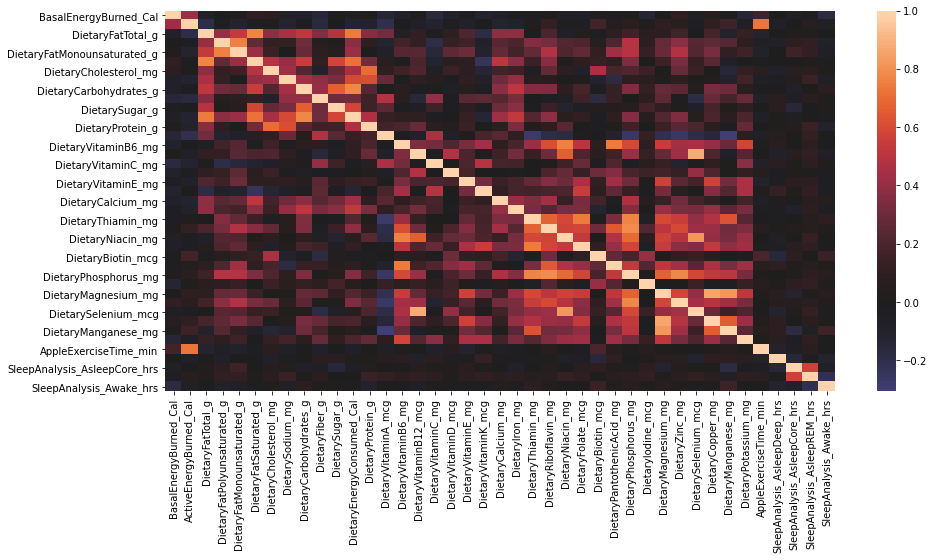

In [1460]:
# Your code here

import seaborn as sns
sns.heatmap(features_std.corr(), center=0);

In [1461]:
#let's try to analyze the PCA's here

from sklearn.decomposition import PCA
import numpy as np

pca_1 = PCA(n_components=12)
pca_2 = PCA(n_components=24)
pca_3 = PCA(n_components=36)

principalComponents = pca_1.fit_transform(features_std)
principalComponents = pca_2.fit_transform(features_std)
principalComponents = pca_3.fit_transform(features_std)

print(np.sum(pca_1.explained_variance_ratio_))
print(np.sum(pca_2.explained_variance_ratio_))
print(np.sum(pca_3.explained_variance_ratio_))


0.7872529717555558
0.9507190649255223
0.9956836499867433


Wow, okay, so we can maintain about 80% of our data through 12 components, down from 45. At the same time, a lot of correlation (the heat in our correlation map). It's probably a good time to delve into the data a bit more. Previously, we divided our data into dietary, exercise, and sleep. It turns out, we may need to create further subsets. Let's start with dietary. 

For dietary information, it's useful to think of it in levels. It starts with Level 1 - `DietaryEnergyConsumed_Cal`, from there we go to Level 2 - macronutrients  `DietaryFatTotals_g`, `DietaryCarbohydrates_g`, `DietaryProtein_g`. But fortunately for us, we have, what I call, Level 3 - sub-macronutrients still measured in grams, which includes things like `DietarySugar_g` which is a carbohydrate, and `DietarySaturatedFats_g` which is a fat. Going further, we have micronutrients, or Level 4 - measured in milligrams (or even micrograms) of things like `DietarySodium_mg` and `DietaryCholesterol_mg`.

Same with sleep. With sleep, we have level 2 data - REM, Core, Deep. We also have awake hours as well. Level 1 data, if we wanted it, would consist of the total hours of sleep we got. So, if we chose to include only Level 1 diet data in our analysis, it might be better to be consistent with sleep as well. Same with exercise. We have basal and active calories, or Level 2, and we have exercise minutes. Exercise minutes are even a collary category of workout. 

There's a big correlative overlap between Level 1, 2, & 3. So, we have to make a decision on what we want to include. Given where we are, let's start with Level 1 and go from there.

To do that, let's create these categories of sub-data. For sleep, we'll have to feature engineer to add it.

In [1462]:
#let's add totals for sleep and energy burned
df['SleepAnalysis_AsleepTotal_hrs'] = df['SleepAnalysis_AsleepDeep_hrs'] + df['SleepAnalysis_AsleepCore_hrs'] + df['SleepAnalysis_AsleepREM_hrs']
df['TotalEnergyBurned_Cal'] = df['BasalEnergyBurned_Cal'] + df['ActiveEnergyBurned_Cal']


In [1463]:
#combine all 3 - Level 1 
level_1 = ['DietaryEnergyConsumed_Cal', 'TotalEnergyBurned_Cal', 'SleepAnalysis_AsleepTotal_hrs']
feature_1 = df[level_1]

In [1464]:
#combine - Level 2
level_2_diet = ['DietaryFatTotal_g', 'DietaryProtein_g', 'DietaryCarbohydrates_g']
level_2_exer = ['BasalEnergyBurned_Cal','ActiveEnergyBurned_Cal']
level_2_sleep = ['SleepAnalysis_AsleepDeep_hrs','SleepAnalysis_AsleepCore_hrs','SleepAnalysis_AsleepREM_hrs', 'SleepAnalysis_Awake_hrs']
level_2 = level_2_diet + level_2_exer + level_2_sleep
feature_2 = df[level_2]

In [1465]:
#feature engineering - let's create some of the categories for dietary 3
df['DietaryCarbsResidual_g'] = df['DietaryCarbohydrates_g'] - df['DietarySugar_g'] - df['DietaryFiber_g'] 
df['DietaryFatsResidual_g'] = df['DietaryFatTotal_g'] - df['DietaryFatMonounsaturated_g'] -  df['DietaryFatPolyunsaturated_g'] - df['DietaryFatSaturated_g'] 

#let's aggregate the level 3 dietary information
level_3_diet_carbs = ['DietaryCarbsResidual_g', 'DietarySugar_g', 'DietaryFiber_g']
level_3_diet_fat = ['DietaryFatsResidual_g', 'DietaryFatMonounsaturated_g', 'DietaryFatPolyunsaturated_g', 'DietaryFatSaturated_g']
level_3_diet_protein = ['DietaryProtein_g']
level_3_diet = level_3_diet_carbs + level_3_diet_fat + level_3_diet_protein

#combine - Level 3, please note, there is no level 3 for sleep and exercise, we will reuse level 2 info there
level_3 = level_3_diet + level_2_exer + level_2_sleep
feature_3 = df[level_3]

In [1466]:
#now, let's scale the data and redo or correlation matrix, will use both minmax and standard for reference
scaler_minmax = MinMaxScaler() 
features_1_minmax = pd.DataFrame(scaler_minmax.fit_transform(features_1), columns = features_1.columns)
features_1_minmax['date'] = targets['BodyMass_lb_diff'].index
features_1_minmax = features_1_minmax.set_index('date')

scaler_std = StandardScaler() 
features_1_std = pd.DataFrame(scaler_std.fit_transform(features_1), columns = features_1.columns)
features_1_std['date'] = targets['BodyMass_lb_diff'].index
features_1_std = features_1_std.set_index('date')


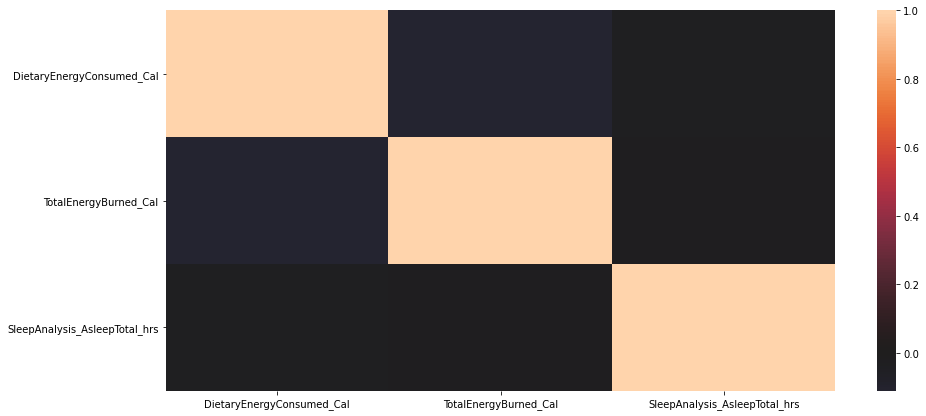

In [1467]:
import seaborn as sns
sns.heatmap(features_1_minmax.corr(), center=0);

Okay, so we solved our correlation and components problem... simply by applying domain knowledge and feature engineering. Now, we can run some analysis here.

So... which analysis should we use first. The solution is obvious... linear regression. Before we dive in, we should be aware of something in our protocol. The weigh-ins occurred every morning, first thing. They are recorded as weight's for that day. But, much like sleep, the weight recorded that morning is really a reflection of the previous days activities. Or, put it this way, the weight recorded on, say, October 17th as nothing to do with the food, exercise, and sleep on October 17th. As their shown in the data, they're linked. It's more accurate to show the weigh-in occuring on October 17th as the result of behaviors on October 16th. We'll make a new column called "Lagged Weight"

In [1468]:
#specify X and Y, remembering to drop the last entry as
X = features_1_std.drop('2024-03-06', axis = 0)
y = targets['BodyMass_lb_lagged_diff'].drop('2024-03-06', axis = 0)

In [1469]:
#create model
level_1_model = sm.OLS(y, sm.add_constant(X))
level_1_results = level_1_model.fit()

#print results
print(level_1_results.summary())

                               OLS Regression Results                              
Dep. Variable:     BodyMass_lb_lagged_diff   R-squared:                       0.116
Model:                                 OLS   Adj. R-squared:                  0.102
Method:                      Least Squares   F-statistic:                     8.349
Date:                     Tue, 14 May 2024   Prob (F-statistic):           3.03e-05
Time:                             12:26:07   Log-Likelihood:                -287.87
No. Observations:                      195   AIC:                             583.7
Df Residuals:                          191   BIC:                             596.8
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [1470]:
features_1_rolling_2 = features_1.rolling(2).sum().drop(['2023-08-24', '2024-03-06'], axis = 0)
y.drop('2023-08-24', axis = 0, inplace = True)

In [1471]:
#specify X and Y, remembering to drop the first entry as
X = features_1_rolling_2

#create model
level_1_model_minmax = sm.OLS(y, sm.add_constant(X))
level_1__minmax_results = level_1_model_minmax.fit()

#print results
print(level_1__minmax_results.summary())

                               OLS Regression Results                              
Dep. Variable:     BodyMass_lb_lagged_diff   R-squared:                       0.099
Model:                                 OLS   Adj. R-squared:                  0.085
Method:                      Least Squares   F-statistic:                     6.970
Date:                     Tue, 14 May 2024   Prob (F-statistic):           0.000179
Time:                             12:26:07   Log-Likelihood:                -287.60
No. Observations:                      194   AIC:                             583.2
Df Residuals:                          190   BIC:                             596.3
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

Okay, or model got worse! We have a slightly higher AIC/BIC, we have one moving average variable (basically 0). And non of our coefficients are statistically significant.

In [1472]:
features_1_rolling_3 = features_1.rolling(3).sum().drop(['2023-08-24', '2023-08-25', '2024-03-06'], axis = 0)
y.drop('2023-08-25', axis = 0,inplace = True)

In [1473]:
#specify X and Y, remembering to drop the first entry as
X = features_1_rolling_3

#create model
level_1_model_minmax = sm.OLS(y, sm.add_constant(X))
level_1__minmax_results = level_1_model_minmax.fit()

#print results
print(level_1__minmax_results.summary())

                               OLS Regression Results                              
Dep. Variable:     BodyMass_lb_lagged_diff   R-squared:                       0.074
Model:                                 OLS   Adj. R-squared:                  0.060
Method:                      Least Squares   F-statistic:                     5.059
Date:                     Tue, 14 May 2024   Prob (F-statistic):            0.00216
Time:                             12:26:07   Log-Likelihood:                -289.24
No. Observations:                      193   AIC:                             586.5
Df Residuals:                          189   BIC:                             599.5
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

This seems to be getting worse. It may be that we don't have adequate data to determine a link with linear regression. Or, let's try testing using binary classification before we go further. We can use binary classification to use alternative

### Binomial Classification

### KNN Neighbors

In [1474]:
# Import train_test_split 
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(feature_3, df['weight_loss'], random_state = 42, test_size = .25)

In [1475]:
y_test

date
2024-01-10    1
2023-12-15    0
2023-09-09    1
2023-11-07    1
2024-01-25    0
2024-02-25    0
2023-11-01    1
2023-10-18    0
2023-09-11    1
2024-02-09    0
2024-01-27    1
2023-09-08    1
2024-02-01    0
2023-10-23    0
2023-12-17    0
2023-12-16    0
2024-01-16    1
2023-09-02    0
2023-11-05    0
2024-02-27    1
2023-12-14    1
2023-11-25    0
2024-01-09    0
2023-10-08    0
2023-11-17    1
2023-10-30    1
2023-12-30    0
2024-02-13    1
2023-09-23    0
2023-10-31    1
2023-11-14    1
2023-12-21    0
2024-02-23    0
2023-09-17    1
2024-01-08    0
2023-11-27    1
2023-10-19    1
2023-09-12    0
2023-12-24    0
2023-11-08    0
2023-08-29    1
2023-10-28    1
2024-01-07    1
2023-11-29    0
2024-02-08    0
2023-12-25    0
2024-02-05    1
2023-09-05    1
2023-09-28    0
Name: weight_loss, dtype: int32

In [1476]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.fit_transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train, columns = feature_3.columns)
scaled_df_train.head()

,DietaryCarbsResidual_g,DietarySugar_g,DietaryFiber_g,DietaryFatsResidual_g,DietaryFatMonounsaturated_g,DietaryFatPolyunsaturated_g,DietaryFatSaturated_g,DietaryProtein_g,BasalEnergyBurned_Cal,ActiveEnergyBurned_Cal,SleepAnalysis_AsleepDeep_hrs,SleepAnalysis_AsleepCore_hrs,SleepAnalysis_AsleepREM_hrs,SleepAnalysis_Awake_hrs
0,-0.085941,-0.101385,1.302003,2.072109,-0.919698,-0.986805,-0.921591,-1.306633,-0.831177,-0.624649,0.014523,-0.384166,0.059767,-0.566856
1,0.087937,-0.355762,0.341221,0.433510,-1.098483,-0.968507,-0.303836,0.156957,0.527435,0.000427,-0.100114,0.389693,0.330695,-0.018720
2,0.011491,0.057988,0.075542,-0.026306,0.041717,0.020035,0.016917,0.058648,0.301154,-1.003828,-1.361128,0.281713,-0.044436,-0.602220
3,-0.022527,0.820272,0.871802,-0.162344,2.894385,2.050587,0.599916,-0.112542,-1.183508,0.132492,1.886938,1.073568,1.018435,-0.177856
4,0.011491,0.057988,0.075542,-0.026306,0.041717,0.020035,0.016917,0.058648,1.287879,-0.094278,0.243799,-1.697926,-2.211860,-0.549174


In [1477]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNeighborsClassifier
clf = KNeighborsClassifier()

# Fit the classifier
clf.fit(scaled_data_train, y_train)

# Predict on the test set
test_preds = clf.predict(scaled_data_test)

In [1478]:
len(test_preds)
len(y_test)

49

In [1479]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# Complete the function
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_preds)

Precision Score: 0.6666666666666666
Recall Score: 0.34782608695652173
Accuracy Score: 0.6122448979591837
F1 Score: 0.4571428571428571


In [1480]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

In [1481]:
find_best_k(scaled_data_train, y_train, scaled_data_test, y_test)
# Expected Output:

# Best Value for k: 17
# F1-Score: 0.7468354430379746

Best Value for k: 7
F1-Score: 0.5555555555555555


In [1482]:
# Instantiate KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier
clf.fit(scaled_data_train, y_train)

# Predict on the test set
test_preds = clf.predict(scaled_data_test)

In [1483]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_preds)

Precision Score: 0.7692307692307693
Recall Score: 0.43478260869565216
Accuracy Score: 0.673469387755102
F1 Score: 0.5555555555555555


### 67% Accurate on Test Data

### Logistic Regression

In [1484]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train, y_train)
model_log

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [1485]:
y_hat_train = logreg.predict(X_train)

train_residuals = np.abs(y_train - y_hat_train)
print(pd.Series(train_residuals, name="Residuals (counts)").value_counts())
print()
print(pd.Series(train_residuals, name="Residuals (proportions)").value_counts(normalize=True))

Residuals (counts)
0    106
1     41
Name: count, dtype: int64

Residuals (proportions)
0    0.721088
1    0.278912
Name: proportion, dtype: float64


72% Accurate on Training Data

In [1486]:
y_hat_test = logreg.predict(X_test)

test_residuals = np.abs(y_test - y_hat_test)
print(pd.Series(test_residuals, name="Residuals (counts)").value_counts())
print()
print(pd.Series(test_residuals, name="Residuals (proportions)").value_counts(normalize=True))

Residuals (counts)
0    31
1    18
Name: count, dtype: int64

Residuals (proportions)
0    0.632653
1    0.367347
Name: proportion, dtype: float64


63% Accurate on the test data

In [1487]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 5, 10],
    'min_samples_split': [1, 5, 10, 20]
}

gs_tree = GridSearchCV(clf, param_grid, cv=3)
gs_tree.fit(X_train, y_train)

gs_tree.best_params_

C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
24 fits failed out of a total of 96.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\benne\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_sampl

{'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 10}

In [1488]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNeighborsClassifier
clf = DecisionTreeClassifier (criterion='gini', max_depth = 2, min_samples_split = 10, random_state = 42)

# Fit the classifier
clf.fit(scaled_data_train, y_train)

# Predict on the test set
test_preds = clf.predict(scaled_data_test)

In [1489]:
dt = DecisionTreeClassifier (criterion='gini', max_depth = 2, min_samples_split = 10, random_state = 42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_split=10, random_state=42)

In [1490]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_preds)

Precision Score: 0.5652173913043478
Recall Score: 0.5652173913043478
Accuracy Score: 0.5918367346938775
F1 Score: 0.5652173913043478


No surprises here. It appears that our Decision Tree classifier performed the worst, with an accuracy of %59

Let's try 
### Naive Bayes 
theorem and see if that helps.

In [1491]:
nvb_3 = pd.DataFrame(feature_3)
nvb_3['target'] =  df['weight_loss']
nvb_3 = nvb_3.reset_index()
nvb_3 = nvb_3.drop('date', axis = 1) 

In [1492]:
aggs = nvb_3.groupby('target').agg(['mean', 'std'])
aggs

DietaryCarbsResidual_g            DietarySugar_g             \
                         mean        std           mean        std   
target                                                               
0                  156.788964  46.517793      56.664762  29.500235   
1                  139.333891  49.125485      45.561542  26.212065   

       DietaryFiber_g           DietaryFatsResidual_g             \
                 mean       std                  mean        std   
target                                                             
0           21.947315  7.107845             40.451824  14.905358   
1           22.828166  7.789377             41.880214  17.765257   

       DietaryFatMonounsaturated_g            ... ActiveEnergyBurned_Cal  \
                              mean       std  ...                   mean   
target                                        ...                          
0                        14.739119  7.575347  ...             765.796251   
1                        13.037035  9.663839  ...             793.593284   

                   SleepAnalysis_AsleepDeep_hrs            \
               std                         mean       std   
target                                                      
0       251.559375                     0.964173  0.215183   
1       253.792499                     0.986171  0.228914   

       SleepAnalysis_AsleepCore_hrs           SleepAnalysis_AsleepREM_hrs  \
                               mean       std                        mean   
target                                                                      
0                          4.697496  0.909539                    1.686295   
1                          4.718695  0.916038                    1.724382   

                 SleepAnalysis_Awake_hrs            
             std                    mean       std  
target                                              
0       0.406582                0.285861  0.449068  
1       0.410443                0.300301  0.464963  

[2 rows x 28 columns]

In [1493]:
from scipy import stats

def p_x_given_class(obs_row, feature, class_):
    mu = aggs[feature]['mean'][class_]
    std = aggs[feature]['std'][class_]
    
    # A single observation
    obs = df.iloc[obs_row][feature] 
    
    p_x_given_y = stats.norm.pdf(obs, loc=mu, scale=std)
    return p_x_given_y

# Notice how this is not a true probability; you can get values > 1
p_x_given_class(0, 'DietarySugar_g', 0)

0.006699241237342687

In [1494]:
def predict_class(row):
    c_probs = []
    for c in range(2):
        # Initialize probability to relative probability of class
        p = len(nvb_3[nvb_3['target'] == c])/len(nvb_3) 
        for feature in feature_3.columns:
            p *= p_x_given_class(row, feature, c)
        c_probs.append(p)
    return np.argmax(c_probs)

In [1495]:
predict_class(row)

1

In [1496]:
nvb_3['Predictions'] = [predict_class(row) for row in nvb_3.index]
nvb_3['Correct?'] = (nvb_3['target'] == nvb_3['Predictions'])
nvb_3['Correct?'].value_counts(normalize=True)

Correct?
True     0.704082
False    0.295918
Name: proportion, dtype: float64

Okay, we got 70% true with Gaussian. This is, arguably our best result. Something to keep in mind as we go forward.
### SVM

In [1529]:
X = nvb_3.drop('target', axis = 1)
y = nvb_3['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, random_state=123)

# Standardize the data


std = StandardScaler()
X_train_transformed = std.fit_transform(X_train)
X_test_transformed = std.transform(X_test)

X_transformed = std.fit_transform(X)

In [1503]:
r_range = np.array([0.01, 1, 10])  
gamma_range = np.array([0.001, 0.01, 0.1]) 
param_grid = dict(gamma=gamma_range, coef0=r_range)
details = []
for gamma in gamma_range:
     for r in r_range:
        clf = svm.SVC(kernel='sigmoid', coef0=r , gamma=gamma)
        clf.fit(X_train_transformed, y_train)
        score = clf.score(X_test_transformed, y_test)
        details.append((r, gamma, clf, score))

In [1515]:
pd.DataFrame(details)

,0,1,2,3
0,0.01,0.001,"SVC(coef0=0.01, gamma=0.001, kernel='sigmoid')",0.428571
1,1.00,0.001,"SVC(coef0=1.0, gamma=0.001, kernel='sigmoid')",0.428571
2,10.00,0.001,"SVC(coef0=10.0, gamma=0.001, kernel='sigmoid')",0.428571
3,0.01,0.010,"SVC(coef0=0.01, gamma=0.01, kernel='sigmoid')",0.653061
4,1.00,0.010,"SVC(coef0=1.0, gamma=0.01, kernel='sigmoid')",0.428571
5,10.00,0.010,"SVC(coef0=10.0, gamma=0.01, kernel='sigmoid')",0.428571
6,0.01,0.100,"SVC(coef0=0.01, gamma=0.1, kernel='sigmoid')",0.877551
7,1.00,0.100,"SVC(coef0=1.0, gamma=0.1, kernel='sigmoid')",0.571429
8,10.00,0.100,"SVC(coef0=10.0, gamma=0.1, kernel='sigmoid')",0.428571


In [1525]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

clf_1 = svm.SVC(coef0=0.01, gamma=0.1, kernel='sigmoid')
clf_1.fit(X_train_transformed, y_train)

SVC(coef0=0.01, gamma=0.1, kernel='sigmoid')

In [1527]:
clf_1.score(X_test_transformed, y_test)

0.8775510204081632

In [1530]:
scores_1 = cross_val_score(clf_1, X_transformed, y, cv=10) #10 fold cross validation
scores

array([0.55      , 0.55      , 0.55      , 0.55      , 0.55      ,
       0.55      , 0.52631579, 0.52631579, 0.52631579, 0.57894737])

In [1518]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

clf_2 = svm.SVC(probability=True)
clf_2.fit(X_train_transformed, y_train)


SVC(probability=True)

In [1519]:
clf_2.score(X_test_transformed, y_test)

0.9795918367346939

In [1536]:
scores = cross_val_score(clf_2, X_transformed, y, cv=20) #10 fold cross validation

In [1537]:
scores

array([0.6       , 0.8       , 0.9       , 1.        , 0.9       ,
       1.        , 1.        , 0.9       , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.8       , 1.        , 1.        , 1.        , 0.66666667])

In [ ]:
Okay, so after a few SVM rounds, it appears we don't have great luck

In [1540]:
clf_2.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [1542]:
from sklearn import svm

svm = svm.SVC(kernel='linear')

svm.fit(X_train_transformed, y_train)
svm.coef_

svm.score(X_test_transformed, y_test)

0.9387755102040817

In [1546]:
scores = cross_val_score(svm, X_transformed, y, cv=15)
scores

array([0.71428571, 0.76923077, 0.84615385, 0.84615385, 0.92307692,
       0.92307692, 0.92307692, 0.92307692, 1.        , 1.        ,
       1.        , 0.92307692, 0.84615385, 1.        , 0.84615385])

In [1545]:
print('w = ',svm.coef_)
print('b = ',svm.intercept_)
print('Indices of support vectors = ', svm.support_)
print('Support vectors = ', svm.support_vectors_)
print('Number of support vectors for each class = ', svm.n_support_)
print('Coefficients of the support vector in the decision function = ', np.abs(svm.dual_coef_))

w =  [[-5.34271185e-05 -5.75542756e-05  8.81491653e-05  2.49541930e-05
  -1.54771890e-04  5.29066582e-05  8.65450414e-05 -8.43483448e-05
  -3.00244492e-05  3.27442434e-05 -4.78337315e-05  1.11953860e-05
   5.10450071e-06 -7.31548820e-05  9.64075280e-01 -8.96868728e-01]]
b =  [0.29250936]
Indices of support vectors =  [  0   4   5   6   8   9  10  12  13  19  23  25  26  27  29  31  33  40
  47  49  51  54  56  62  63  67  70  71  75  76  78  79  80  87  91  92
  96  97  98 102 104 106 109 111 112 114 115 116 123 128 130 133 134 138
 140 146   2   7  11  14  16  17  18  20  32  35  36  39  41  42  44  45
  46  48  50  52  58  61  65  66  68  69  72  77  81  82  84  85  89  90
  95  99 100 101 103 107 118 119 120 121 124 125 126 129 131 135 137 142
 144]
Support vectors =  [[-1.04801757 -0.29217785 -1.40738935 ... -0.33650551  1.31233465
  -1.60790729]
 [-0.03469817 -0.04830123  0.009039   ... -0.23238887 -0.76200076
   0.6219264 ]
 [-0.03469817 -0.04830123  0.009039   ... -0.18033056 -0

In [920]:
total = features['2023-08-23':'2023-10-24'].index
total = total.append(features['2023-10-31':'2023-12-23'].index)
total = total.append(features['2024-01-01':'2024-02-05'].index)
total = total.append(features['2024-02-24':'2024-03-05'].index)
total

DatetimeIndex(['2023-08-24', '2023-08-25', '2023-08-26', '2023-08-27',
               '2023-08-28', '2023-08-29', '2023-08-30', '2023-08-31',
               '2023-09-01', '2023-09-02',
               ...
               '2024-02-25', '2024-02-26', '2024-02-27', '2024-02-28',
               '2024-02-29', '2024-03-01', '2024-03-02', '2024-03-03',
               '2024-03-04', '2024-03-05'],
              dtype='datetime64[ns]', name='date', length=163, freq=None)

### Pipeline, 
let's establish pipelines for each of our tests. We won't necessarily worry about some of our less accurate ones, but we can start with the basics. We've had good results for Naive Bayes, KNN, and SVM. So, let's run a few test

,DietaryEnergyConsumed_Cal,ActiveEnergyBurned_Cal,SleepAnalysis_AsleepTotal_hrs,BodyMass_lb_diff
DietaryEnergyConsumed_Cal,1.000000,-0.149283,0.022897,0.392240
ActiveEnergyBurned_Cal,-0.149283,1.000000,-0.186186,-0.236618
SleepAnalysis_AsleepTotal_hrs,0.022897,-0.186186,1.000000,0.286182
BodyMass_lb_diff,0.392240,-0.236618,0.286182,1.000000


Now that we've established which of our dietary restrictions are

interesting... it appears we have some zero values here. So, first thing is to do deal with the missing values for body mass. There also appears to be an errant entry.  let's take a closer look here this column.

yes, so the errant entry is 338.5, which, looks like an abboration. Lets' go ahead and fix that as well as create nan values for the 0s.

Wow, that's significant. It appears that roughly 30% of the values are missing (or zero). We'll have to figure out how to manage this. 

Let's figure out where all of the gaps are. Perhaps there's a few chunks of data that we can isolate. Perhaps we can SMOTE a few isolated instances. But to SMOTE we'll have to be sure that there is other data accompanying it. FOr instance, we know from generally from the media that carbs play a factor in weight. Perhaps we

To achieve this, let's create a list of those days with consecutive peices, and then isolate them.